In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [28]:
data = pd.read_csv('data_populated_0_7999.csv')
# data = data.iloc[:59,:].copy()

In [29]:
data.rename(columns = {"property_costs":"property_cost(Rmb/m^2/month)", "total_area":"total_area(m2)", "green_rating": "green_rating(%)"},inplace = True)

In [30]:
data = data.replace(u'暂无数据', np.nan).dropna()

In [31]:
data.head()

,Unnamed: 0,address,link,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),developer_company,property_management_company
0,0,汤臣一品,https://shanghai.anjuke.com/community/view/8,31.238608,121.508381,公寓,15.00元/平米/月,141894m²,220户,2006年,200,5.97,40%(高),汤臣海景花园（上海浦东新区）有限公司,晶华物业有限公司
1,1,中粮海景壹号,https://shanghai.anjuke.com/community/view/218807,31.236882,121.510280,公寓,12.00元/平米/月,116605m²,317户,2010年,200,4,51%(高),上海鹏利置业发展有限公司,上海高力国际物业服务有限公司
4,4,长岛花苑,https://shanghai.anjuke.com/community/view/2679,31.270386,121.609057,公寓,1.00元/平米/月,23000m²,2034户,1993年,1000,1.2,35%(一般),上海浦东伟业房地产开发总公司,上海洋泾物业
5,5,陆家嘴国际华城,https://shanghai.anjuke.com/community/view/174,31.241847,121.542053,公寓,2.00元/平米/月,200000m²,1200户,2004年,900,2.2,60%(高),上海华能天地房地产有限公司,陆家嘴物业
8,8,碧云国际社区晓园,https://shanghai.anjuke.com/community/view/100,31.247269,121.598271,公寓,3.90元/平米/月,50000m²,268户,2006年,380,1.6,49%(高),上海中通贵云实业有限公司,上海金晨物业管理有限公司


In [32]:
data["property_type"] = data["property_type"].map({"公寓":0,"别墅":1})
data["property_type"] = data["property_type"].fillna(0)

In [33]:
data["property_cost(Rmb/m^2/month)"] = data["property_cost(Rmb/m^2/month)"].str.replace(r'[^\d\.]+','')

In [34]:
data["number_of_units"] = data["number_of_units"].str.replace(r'[^\d]+','')
data["year_built"] = data["year_built"].str.replace(r'[^\d]+','')
data["parking_spots"] = data["parking_spots"].str.replace(r'[^\d]+','')
data["volume_rate"] = data["volume_rate"].str.replace(r'[^\d]+','')
data["green_rating(%)"] = data["green_rating(%)"].str.replace(r'[^\d]+','')
data["total_area(m2)"] = data["total_area(m2)"].str.replace(r'[^\d]+','')

In [35]:
data.head()

,Unnamed: 0,address,link,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,parking_spots,volume_rate,green_rating(%),developer_company,property_management_company
0,0,汤臣一品,https://shanghai.anjuke.com/community/view/8,31.238608,121.508381,0.0,15.00,141894,220,2006,200,597,40,汤臣海景花园（上海浦东新区）有限公司,晶华物业有限公司
1,1,中粮海景壹号,https://shanghai.anjuke.com/community/view/218807,31.236882,121.510280,0.0,12.00,116605,317,2010,200,4,51,上海鹏利置业发展有限公司,上海高力国际物业服务有限公司
4,4,长岛花苑,https://shanghai.anjuke.com/community/view/2679,31.270386,121.609057,0.0,1.00,23000,2034,1993,1000,12,35,上海浦东伟业房地产开发总公司,上海洋泾物业
5,5,陆家嘴国际华城,https://shanghai.anjuke.com/community/view/174,31.241847,121.542053,0.0,2.00,200000,1200,2004,900,22,60,上海华能天地房地产有限公司,陆家嘴物业
8,8,碧云国际社区晓园,https://shanghai.anjuke.com/community/view/100,31.247269,121.598271,0.0,3.90,50000,268,2006,380,16,49,上海中通贵云实业有限公司,上海金晨物业管理有限公司


In [36]:
price = pd.read_csv("data_prices_4000-8000.csv")
price[60*36:-72]

,Unnamed: 0,index,name,date,price
2160,2160,4000,上良小区,201504,7458
2161,2161,4000,上良小区,201505,11471
2162,2162,4000,上良小区,201506,10343
2163,2163,4000,上良小区,201507,9041
2164,2164,4000,上良小区,201508,10812
2165,2165,4000,上良小区,201509,16511
2166,2166,4000,上良小区,201510,16818
2167,2167,4000,上良小区,201511,16844
2168,2168,4000,上良小区,201512,15279
2169,2169,4000,上良小区,201601,15738


In [37]:
wide = price[60*36:-72].pivot_table(index = 'index', columns = 'date', values = 'price')
wide

date,201504,201505,201506,201507,201508,201509,201510,201511,201512,201601,...,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803
index,,,,,,,,,,,,,,,,,,,,,
4000,7458,11471,10343,9041,10812,16511,16818,16844,15279,15738,...,30137,30136,30608,30409,25925,25008,25037,28250,25606,26315
4001,22645,22540,23741,23830,23842,23442,22855,23805,24635,25607,...,52496,52443,49889,49527,48691,51218,50234,48544,46611,48128
4002,92796,94739,97272,102720,118408,104809,100432,99726,98916,103107,...,114027,114898,114637,114637,114690,119609,130802,143431,163775,165441
4003,27195,28160,28542,28981,29611,30044,31569,32276,33587,34615,...,53609,54116,53364,53116,53059,52476,53843,57096,56189,57393
4004,21956,22493,23025,23125,23964,24419,24419,26272,26302,25818,...,49636,46007,44621,44068,42941,40564,40879,40959,40933,40962
4005,37221,40738,41046,44740,38517,48953,58608,39286,33480,46132,...,55831,49224,46827,46488,41242,41640,42830,42183,41547,41478
4006,56367,54656,53425,53786,53889,61633,58339,59498,56618,58537,...,63315,63191,58261,67255,62875,61564,59684,57569,60272,71987
4007,27080,30986,31277,30649,30609,30931,29688,29813,31721,36764,...,57494,57514,56065,57500,56168,55540,54495,60110,51525,50325
4008,27799,27750,29445,29464,28974,29364,29528,29700,29864,31554,...,57853,55018,54641,52648,52592,51775,48648,48761,49451,49627


In [38]:
data.index

Int64Index([   0,    1,    4,    5,    8,   13,   17,   20,   23,   25,
            ...
            7782, 7783, 7784, 7785, 7974, 7975, 7982, 7987, 7996, 7999],
           dtype='int64', length=2721)

In [39]:
data_with_price = data.merge(wide, how = 'inner', left_index = True, right_index = True)
data_with_price.head().T

,4002,4003,4004,4005,4007
Unnamed: 0,4001,4002,4003,4004,4006
address,鸿福新村,豪嘉府邸,秀枫翠谷,沪江新苑,苹果园(公寓)
link,https://shanghai.anjuke.com/community/view/7059,https://shanghai.anjuke.com/community/view/6991,https://shanghai.anjuke.com/community/view/6945,https://shanghai.anjuke.com/community/view/6919,https://shanghai.anjuke.com/community/view/6886
long,31.1304,31.1863,31.1646,31.1823,31.1802
lat,121.425,121.395,121.371,121.355,121.397
property_type,0,1,0,0,0
property_cost(Rmb/m^2/month),0.40,5.00,0.60,0.50,1.00
total_area(m2),4500,6541,150000,36000,70000
number_of_units,816,16,800,868,630
year_built,1994,1998,1996,2000,1998


In [40]:
data_with_price

,Unnamed: 0,address,link,long,lat,property_type,property_cost(Rmb/m^2/month),total_area(m2),number_of_units,year_built,...,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803
4002,4001,鸿福新村,https://shanghai.anjuke.com/community/view/7059,31.130442,121.425372,0.0,0.40,4500,816,1994,...,114027,114898,114637,114637,114690,119609,130802,143431,163775,165441
4003,4002,豪嘉府邸,https://shanghai.anjuke.com/community/view/6991,31.186257,121.394641,1.0,5.00,6541,16,1998,...,53609,54116,53364,53116,53059,52476,53843,57096,56189,57393
4004,4003,秀枫翠谷,https://shanghai.anjuke.com/community/view/6945,31.164590,121.371177,0.0,0.60,150000,800,1996,...,49636,46007,44621,44068,42941,40564,40879,40959,40933,40962
4005,4004,沪江新苑,https://shanghai.anjuke.com/community/view/6919,31.182321,121.354818,0.0,0.50,36000,868,2000,...,55831,49224,46827,46488,41242,41640,42830,42183,41547,41478
4007,4006,苹果园(公寓),https://shanghai.anjuke.com/community/view/6886,31.180182,121.397327,0.0,1.00,70000,630,1998,...,57494,57514,56065,57500,56168,55540,54495,60110,51525,50325
4008,4007,旅专小区,https://shanghai.anjuke.com/community/view/6878,31.185839,121.403435,0.0,0.80,3500,420,1998,...,57853,55018,54641,52648,52592,51775,48648,48761,49451,49627
4009,4008,水清二村,https://shanghai.anjuke.com/community/view/6791,31.122051,121.388575,0.0,1.20,100000,1300,1997,...,44871,44870,45572,53769,62531,68840,67371,49031,66659,67552
4011,4010,虹梅佳苑,https://shanghai.anjuke.com/community/view/6391,31.127679,121.425421,0.0,0.70,35000,381,2004,...,57346,56703,55415,54052,51682,50882,50285,50173,48667,48400
4012,4011,莲浦花苑,https://shanghai.anjuke.com/community/view/4777,31.132375,121.401815,0.0,1.50,100000,888,1998,...,37504,36785,36634,38028,37732,37468,37602,37295,36898,36610
4013,4012,现代苑,https://shanghai.anjuke.com/community/view/4687,31.043189,121.473379,0.0,0.80,12000,1380,2003,...,46430,45796,43436,43479,42457,40177,39979,39370,40274,41701


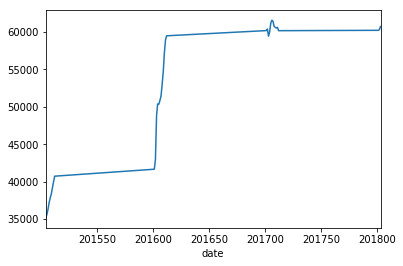

In [50]:
price_mean = price.copy()
price_mean['price'] = price_mean['price'].replace(0.0, np.nan)
price_mean.groupby('date').mean()['price'].plot()
plt.show()

In [49]:
price_mean

,Unnamed: 0,index,name,date,price
36,36.0,1.0,中粮海景壹号,201504,160908.0
37,37.0,1.0,中粮海景壹号,201505,160085.0
38,38.0,1.0,中粮海景壹号,201506,159610.0
39,39.0,1.0,中粮海景壹号,201507,159555.0
40,40.0,1.0,中粮海景壹号,201508,159726.0
41,41.0,1.0,中粮海景壹号,201509,136818.0
42,42.0,1.0,中粮海景壹号,201510,143277.0
43,43.0,1.0,中粮海景壹号,201511,135228.0
44,44.0,1.0,中粮海景壹号,201512,148283.0
45,45.0,1.0,中粮海景壹号,201601,172437.0
